<a href="https://colab.research.google.com/github/ianmuchai/Laptops_Dataset/blob/main/laptops_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [15]:
uploaded = files.upload()

Saving laptopdata.csv to laptopdata (1).csv


In [16]:
file_name = 'laptopdata.csv'
data = pd.read_csv(file_name)

In [ ]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [17]:
data_info = {
    "First Five Rows": data.head(),
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

data_info

{'First Five Rows':    Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
 0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
 1         1.0   Apple  Ultrabook   13.3                            1440x900   
 2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
 3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
 4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
 
                           Cpu   Ram               Memory  \
 0        Intel Core i5 2.3GHz   8GB            128GB SSD   
 1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
 2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
 3        Intel Core i7 2.7GHz  16GB            512GB SSD   
 4        Intel Core i5 3.1GHz   8GB            256GB SSD   
 
                             Gpu  OpSys  Weight        Price  
 0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
 1   

In [18]:
# Convert 'Ram' and 'Weight' to numeric, removing non-numeric characters
data['Ram'] = pd.to_numeric(data['Ram'].str.replace('GB', ''), errors='coerce')
data['Weight'] = pd.to_numeric(data['Weight'].str.replace('kg', ''), errors='coerce')

# Drop rows with any NaN values introduced by the conversion
data = data.dropna()

# Optional: Drop the 'Unnamed: 0' column if it's just an index
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

<ipython-input-18-60a228748c54>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Unnamed: 0', axis=1, inplace=True)


In [19]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [20]:
# Check data types
print(data.dtypes)

# Check for any remaining missing values
print(data.isnull().sum())

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                 float64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [21]:
# Display summary statistics for numerical columns
print(data.describe())

               Ram       Weight          Price
count  1272.000000  1272.000000    1272.000000
mean      8.463050     2.077618   59942.255185
std       5.566582     0.807808   37343.798468
min       1.000000     0.000200    9270.720000
25%       4.000000     1.500000   31914.720000
50%       8.000000     2.040000   52107.840000
75%       8.000000     2.320000   79346.840400
max      64.000000    11.100000  324954.720000


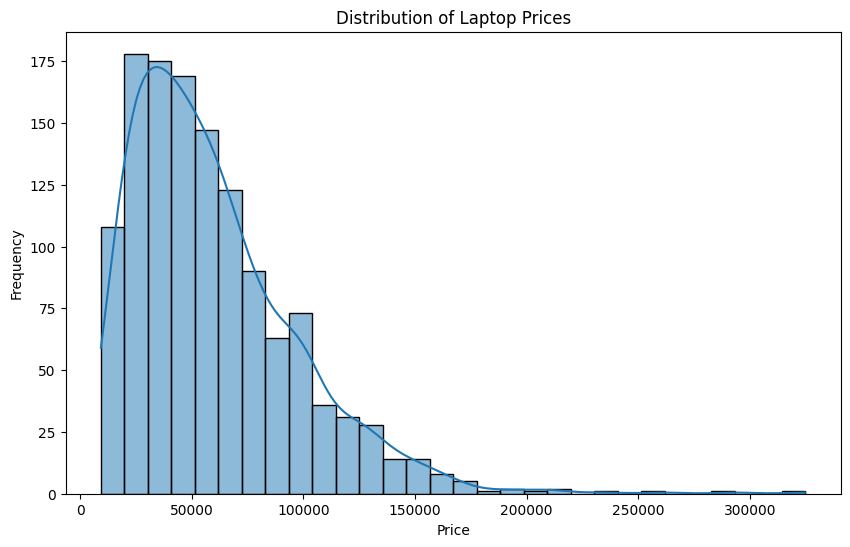

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-23-b538ba349187>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


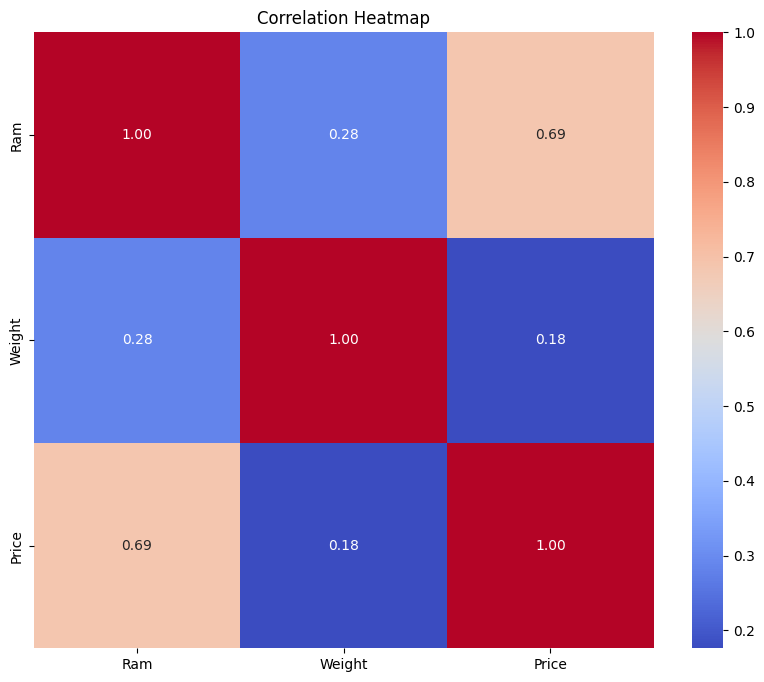

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()